<a href="https://colab.research.google.com/github/Maks6666/CV/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [1]:
import torch
import numpy as np

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [11]:
print(torch.cuda.is_available())

if torch.cuda.is_available():
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name())
  print(torch.cuda.get_device_capability())
  print(torch.cuda.get_device_properties)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor = torch.tensor([1, 2, 3])
tensor = tensor.to(device)
print(tensor.device)

True
1
Tesla T4
(7, 5)
<function get_device_properties at 0x7f808ebbc4c0>
cuda:0


In [13]:
tensor = torch.tensor([1, 2, 3], device=device)
tensor.device

device(type='cuda', index=0)

# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [14]:
print(torch.cuda.is_available())

if torch.cuda.is_available():
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name())
  print(torch.cuda.get_device_capability())
  print(torch.cuda.get_device_properties)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor = torch.tensor([1, 2, 3])
tensor = tensor.to(device)
print(tensor.device)

True
1
Tesla T4
(7, 5)
<function get_device_properties at 0x7f808ebbc4c0>
cuda:0


# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [20]:
tensor = torch.rand(2, 3)
print(tensor.shape)
print(tensor.size)
print(tensor.device)
print(tensor.requires_grad)
print(type(tensor))

torch.Size([2, 3])
<built-in method size of Tensor object at 0x7f7fd8a1d3a0>
cpu
False
<class 'torch.Tensor'>


# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [23]:
tensor_1 = torch.rand(1, 100)
tensor_2 = torch.rand(1, 100)

mae = torch.mean(torch.abs(tensor_1 - tensor_2))
mae.item()

0.3225947618484497

# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 112х28х28

In [28]:
tensor_1 = torch.rand(32, 28, 28)
tensor_2 = torch.rand(16, 28, 28)
tensor_3 = torch.rand(64, 28, 28)

commom_tensor = torch.cat([tensor_1, tensor_2, tensor_3], dim=0)
commom_tensor.shape

torch.Size([112, 28, 28])

# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [53]:
from torch.optim import SGD

def f(x):
  return x**2/3 + torch.sin(torch.pi*x)


device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

x = torch.tensor(3.0, requires_grad=True)

learning_rate = 1e-3
momentum = 0.9

optimizer = SGD([x],
                lr=learning_rate,
                momentum=momentum)





for i in range(500):
  loss = f(x)

  loss.backward()

  if i % 5 == 0:
    print(f"Loss on {i} iteration: {loss.item()}")

  optimizer.step()
  optimizer.zero_grad()

Loss on 0 iteration: 3.0
Loss on 5 iteration: 2.9829928874969482
Loss on 10 iteration: 2.9477968215942383
Loss on 15 iteration: 2.9060966968536377
Loss on 20 iteration: 2.8676326274871826
Loss on 25 iteration: 2.838982343673706
Loss on 30 iteration: 2.8221583366394043
Loss on 35 iteration: 2.815027952194214
Loss on 40 iteration: 2.8135316371917725
Loss on 45 iteration: 2.8140664100646973
Loss on 50 iteration: 2.814631938934326
Loss on 55 iteration: 2.814671039581299
Loss on 60 iteration: 2.814352035522461
Loss on 65 iteration: 2.813973903656006
Loss on 70 iteration: 2.8137052059173584
Loss on 75 iteration: 2.8135735988616943
Loss on 80 iteration: 2.8135340213775635
Loss on 85 iteration: 2.8135342597961426
Loss on 90 iteration: 2.813542127609253
Loss on 95 iteration: 2.813544988632202
Loss on 100 iteration: 2.8135428428649902
Loss on 105 iteration: 2.8135385513305664
Loss on 110 iteration: 2.81353497505188
Loss on 115 iteration: 2.8135321140289307
Loss on 120 iteration: 2.81353211402893

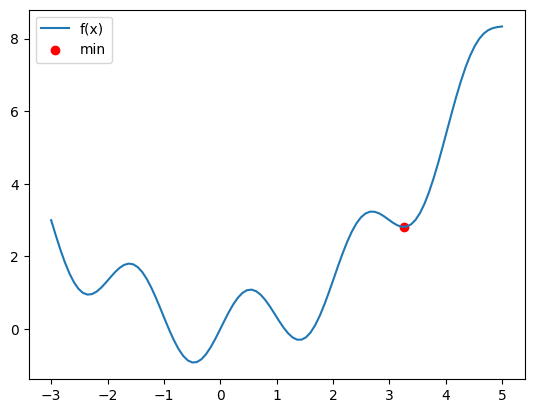

In [56]:

import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [59]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + \
  torch.cos(y)*torch.exp((1-torch.sin(x))**2) + \
  (x-y)**2

In [61]:
x = torch.tensor(2.0, requires_grad=True)
# x.device
y = torch.tensor(1.0, requires_grad=True)

learning_rate = 1e-2

optimizer = SGD(([x, y]),
                lr=learning_rate
                )

for i in range(500):
  loss = f1(x, y)

  loss.backward()

  if i % 5 == 0:
    print(f"Loss on {i} iteration: {loss.item()}")


  optimizer.step()
  optimizer.zero_grad()


Loss on 0 iteration: 835.1488037109375
Loss on 5 iteration: 835.0267333984375
Loss on 10 iteration: 834.904541015625
Loss on 15 iteration: 834.7826538085938
Loss on 20 iteration: 834.6611938476562
Loss on 25 iteration: 834.5403442382812
Loss on 30 iteration: 834.4203491210938
Loss on 35 iteration: 834.3013305664062
Loss on 40 iteration: 834.1835327148438
Loss on 45 iteration: 834.0669555664062
Loss on 50 iteration: 833.951904296875
Loss on 55 iteration: 833.8384399414062
Loss on 60 iteration: 833.7266235351562
Loss on 65 iteration: 833.6165771484375
Loss on 70 iteration: 833.5084838867188
Loss on 75 iteration: 833.40234375
Loss on 80 iteration: 833.2982177734375
Loss on 85 iteration: 833.1962890625
Loss on 90 iteration: 833.0963745117188
Loss on 95 iteration: 832.998779296875
Loss on 100 iteration: 832.9033203125
Loss on 105 iteration: 832.8101806640625
Loss on 110 iteration: 832.7192993164062
Loss on 115 iteration: 832.6306762695312
Loss on 120 iteration: 832.5443115234375
Loss on 125

In [63]:
x = torch.tensor(2.0, requires_grad=True)
# x.device
y = torch.tensor(3.0, requires_grad=True)

learning_rate = 1e-3

optimizer = SGD(([x, y]),
                lr=learning_rate
                )

for i in range(600):
  loss = f2(x, y)

  loss.backward()

  if i % 5 == 0:
    print(f"Loss on {i} iteration: {loss.item()}")


  optimizer.step()
  optimizer.zero_grad()

Loss on 0 iteration: 16.866668701171875
Loss on 5 iteration: 16.169422149658203
Loss on 10 iteration: 15.582855224609375
Loss on 15 iteration: 15.071672439575195
Loss on 20 iteration: 14.61463451385498
Loss on 25 iteration: 14.198225021362305
Loss on 30 iteration: 13.81344223022461
Loss on 35 iteration: 13.454063415527344
Loss on 40 iteration: 13.11563777923584
Loss on 45 iteration: 12.794897079467773
Loss on 50 iteration: 12.489376068115234
Loss on 55 iteration: 12.197181701660156
Loss on 60 iteration: 11.916816711425781
Loss on 65 iteration: 11.647090911865234
Loss on 70 iteration: 11.387033462524414
Loss on 75 iteration: 11.135841369628906
Loss on 80 iteration: 10.892841339111328
Loss on 85 iteration: 10.657469749450684
Loss on 90 iteration: 10.429235458374023
Loss on 95 iteration: 10.20771598815918
Loss on 100 iteration: 9.992537498474121
Loss on 105 iteration: 9.783378601074219
Loss on 110 iteration: 9.57994270324707
Loss on 115 iteration: 9.38197135925293
Loss on 120 iteration: 9

In [67]:
x = torch.tensor(1.0, requires_grad=True)
# x.device
y = torch.tensor(3.0, requires_grad=True)

learning_rate = 1e-3

optimizer = SGD(([x, y]),
                lr=learning_rate
                )

for i in range(300):
  loss = f3(x, y)

  loss.backward()

  if i % 5 == 0:
    print(f"Loss on {i} iteration: {loss.item()}")


  optimizer.step()
  optimizer.zero_grad()

Loss on 0 iteration: 153.89373779296875
Loss on 5 iteration: 143.69793701171875
Loss on 10 iteration: 130.17987060546875
Loss on 15 iteration: 121.33487701416016
Loss on 20 iteration: 116.86959075927734
Loss on 25 iteration: 114.48755645751953
Loss on 30 iteration: 113.07481384277344
Loss on 35 iteration: 112.15924072265625
Loss on 40 iteration: 111.52450561523438
Loss on 45 iteration: 111.06139373779297
Loss on 50 iteration: 110.70984649658203
Loss on 55 iteration: 110.43451690673828
Loss on 60 iteration: 110.21332550048828
Loss on 65 iteration: 110.03189849853516
Loss on 70 iteration: 109.88043975830078
Loss on 75 iteration: 109.75209045410156
Loss on 80 iteration: 109.64192199707031
Loss on 85 iteration: 109.54627990722656
Loss on 90 iteration: 109.4624252319336
Loss on 95 iteration: 109.38825988769531
Loss on 100 iteration: 109.32213592529297
Loss on 105 iteration: 109.26275634765625
Loss on 110 iteration: 109.20909881591797
Loss on 115 iteration: 109.16031646728516
Loss on 120 ite